In [1]:
import re
import pandas as pd

In [2]:
df = pd.read_csv("clean_nus_sms.csv")

In [3]:
print(df.head())

   Unnamed: 0     id                                            Message  \
0           0  10120                              Bugis oso near wat...   
1           1  10121  Go until jurong point, crazy.. Available only ...   
2           2  10122     I dunno until when... Lets go learn pilates...   
3           3  10123  Den only weekdays got special price... Haiz......   
4           4  10124                             Meet after lunch la...   

  length country    Date  
0     21      SG  2003/4  
1    111      SG  2003/4  
2     46      SG  2003/4  
3    140      SG  2003/4  
4     22      SG  2003/4  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48598 entries, 0 to 48597
Data columns (total 6 columns):
Unnamed: 0    48598 non-null int64
id            48598 non-null int64
Message       48595 non-null object
length        48598 non-null object
country       48598 non-null object
Date          48598 non-null object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48595 entries, 0 to 48597
Data columns (total 6 columns):
Unnamed: 0    48595 non-null int64
id            48595 non-null int64
Message       48595 non-null object
length        48595 non-null object
country       48595 non-null object
Date          48595 non-null object
dtypes: int64(2), object(4)
memory usage: 2.6+ MB


In [7]:
print(type(df["Message"]))

<class 'pandas.core.series.Series'>


In [8]:
df["Message_clean"] = df["Message"].str.lower()

In [9]:
print(type(df["Message_clean"]))

<class 'pandas.core.series.Series'>


In [10]:
df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_clean
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


In [11]:
df["Message_clean"] = df["Message_clean"].str.replace(r'[^\w\s]','')

In [12]:
df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_clean
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


In [13]:
df["Message_clean"] = df["Message_clean"].str.replace(r'[<.*?>]','')

In [14]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [15]:
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_urls(text))
# View changes
df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_clean
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


In [16]:
import nltk
# Import word_tokenize from nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# Tokenize cleaned messages
df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VighneshSrinivasaBal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,id,Message,length,country,Date,Message_clean,Message_tokenized
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]"
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai..."
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"


In [17]:
df['Message_tokenizeds'] = df["Message_clean"].tokenized()

AttributeError: 'Series' object has no attribute 'tokenized'

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function for plotting in notebook
%matplotlib inline
import numpy as np

In [19]:
df.country.nunique()

40

In [20]:
df.country.value_counts()

Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
United Kingdom            30
srilanka                  30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
New Zealand               10
Lebanon                   10
UK                        10
Slovenia                  10
Turkey                    10
Italia                    10
Macedonia                 10
Nigeria                   10
Trinidad and Tobago       10
Australia                  9
Morocco                    9
Romania       

In [21]:
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})

In [22]:
df['country'].nunique()

33

In [23]:
df.country.value_counts()

Singapore              31817
India                   7085
United States           5680
Sri Lanka               1047
Malaysia                 767
Pakistan                 751
Unknown                  602
Canada                   198
Bangladesh               126
China                    107
Philippines               67
Indonesia                 48
United Kingdom            40
Nepal                     39
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Lebanon                   10
New Zealand               10
Macedonia                 10
Turkey                    10
Slovenia                  10
Nigeria                   10
Trinidad and Tobago       10
Italia                    10
Romania                    9
Morocco                    9
Australia                  9
Jamaica                    8
Barbados                   8
France                     5
Spain                      5
Name: country, dtype: int64

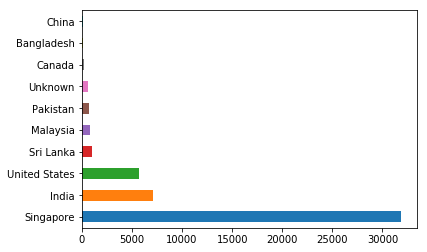

In [24]:
(df.country.value_counts().head(10)).plot.barh()

In [25]:
print(type(df.length[0]))

<class 'str'>


In [26]:
df.length.describe()

count     48595
unique      470
top          20
freq        861
Name: length, dtype: object

In [29]:
df["length_int"] = df["length"].dropna()
df.length_int.describe()

count     48595
unique      470
top          20
freq        861
Name: length_int, dtype: object

In [52]:
df.length = pd.to_numeric(df.length, errors='coerce')

In [53]:
print(type(df.length[0]))

<class 'numpy.float64'>


In [68]:
df.length = pd.to_numeric(df.length, errors='coerce').fillna(df.length.mean()).astype(np.int64)

In [69]:
df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_clean,Message_tokenized,length_int,checkint
0,0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",21,False
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",111,False
2,2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",46,False
3,3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",140,False
4,4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",22,False


In [70]:
df.length.mean()

54.85067808120511

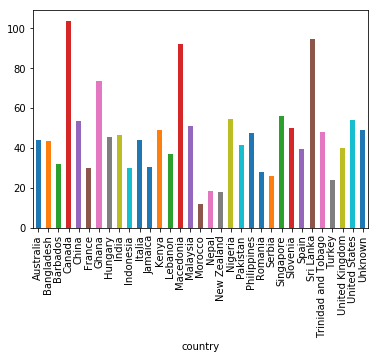

In [77]:
df.length.groupby(df.country).mean().plot.bar()

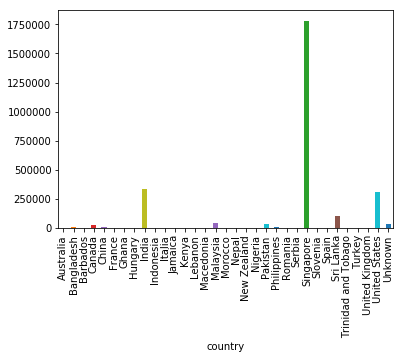

In [78]:
df.length.groupby(df.country).sum().plot.bar()

In [117]:
df["year"] = df.Date.apply(lambda x : x.split("/")[0])
df["month"] = df.Date.apply(lambda x : x.split("/")[1])

In [118]:
df.year.nunique()

7

In [119]:
df.year = pd.to_numeric(df.year, errors='coerce').fillna(df.year.mean()).astype(np.int64)
df.month = pd.to_numeric(df.month, errors='coerce').fillna(df.month.mean()).astype(np.int64)

In [120]:
type(df.year[0])

numpy.int64

In [121]:
df[["length","year"]].mean()

length      54.850678
year      2009.558290
dtype: float64

In [122]:
df.groupby(["country","year"])["length"].mean()

country              year
Australia            2015     43.888889
Bangladesh           2011     25.305556
                     2012     69.000000
                     2014     55.350000
                     2015     32.833333
Barbados             2015     31.750000
Canada               2011    103.782828
China                2011     53.654206
France               2010     30.000000
Ghana                2012     73.500000
Hungary              2015     45.464286
India                2010     48.039971
                     2011     47.781576
                     2012     33.966825
                     2013     32.250000
                     2014     39.114094
                     2015     22.451613
Indonesia            2012     66.100000
                     2014     20.368421
Italia               2015     44.200000
Jamaica              2014     30.375000
Kenya                2012     48.850000
Lebanon              2012     36.900000
Macedonia            2011     92.200000
Malaysia      

In [123]:
df.groupby(["year","month"])["length"].mean()

year  month
2003  4         51.813463
2010  11        43.439477
      12        57.149466
2011  1         52.041404
      2         50.982934
      3         56.836608
      4         54.853319
      5        105.400000
      6        113.438356
      8         43.354717
      9        108.439252
      11        37.978218
      12        79.649276
2012  2         49.602151
      3         85.435583
      4         41.250000
      5         34.540000
      6         40.714286
      7         35.517007
      8         35.886792
      10        11.800000
2013  5         44.363636
2014  9         44.984065
      11        35.553191
      12        38.020000
2015  2         29.815385
      3         24.290909
Name: length, dtype: float64

In [124]:
# Download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\VighneshSrinivasaBal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VighneshSrinivasaBal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VighneshSrinivasaBal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [125]:
from nltk.corpus import twitter_samples

In [126]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

In [127]:
print(pos_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


In [129]:
print(f"there are {len(pos_tweets)} number of positive tweets")

there are 5000 number of positive tweets


In [130]:
print(type(pos_tweets))

<class 'list'>


In [131]:
print(neg_tweets)

['hopeless for tmr :(', "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(", '@Hegelbon That heart sliding into the waste basket. :(', '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too', 'Dang starting next week I have "work" :(', "oh god, my babies' faces :( https://t.co/9fcwGvaki0", '@RileyMcDonough make me smile :((', '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln', 'why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"', 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz', "I have a really good m&amp;g idea but I'm never going to meet them :(((", '@Rampageinthebox mare ivan :(', '@SophiaMascardo happy trip, keep safe. see you soon :* :(', "I'm so tired hahahah :(", '@GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch.', 'relate 

In [132]:
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tweet_tokens[0])


neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
print(neg_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


In [134]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [135]:
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        url_cleaned = remove_urls(token)
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)

    positive_cleaned_tweets_list.append(cleaned_tweet)

for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        url_cleaned = remove_urls(token)
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
  
    negative_cleaned_tweets_list.append(cleaned_tweet)


print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

In [137]:
list_of_all_tokens = positive_cleaned_tweets_list + negative_cleaned_tweets_list

In [138]:
all_tweetsastokens = [token for s in list_of_all_tokens for token in s]

In [139]:
print(all_tweetsastokens)

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)', '@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!', '@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!', '@97sides', 'CONGRATS', ':)', 'yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days', '@BhaktisBanter', '@PallaviRuhail', 'This', 'one', 'is', 'irresistible', ':)', '#FlipkartFashionFriday', '', 'We', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'We', 'hope', 'you', 'enjoy', '!', 'H

In [140]:
all_tokens = nltk.FreqDist(token for token in all_tweetsastokens)

In [141]:
print(len(all_tokens))

22697


In [142]:
print(all_tokens)

<FreqDist with 22697 samples and 130099 outcomes>


In [147]:
print(all_tokens.most_common(10))

[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


In [148]:
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

In [149]:
sentiment_features[:5]

[':(', ':)', '!', 'I', '.']

In [150]:
def document_features(document,sentiment_features):
    doc = set(document)
    features = {}
    for token in sentiment_features:
        features[token] = token in doc
    return features

In [151]:
test = " I am very good in coding :)".split(" ")
print(document_features(test,sentiment_features))

{':(': False, ':)': True, '!': False, 'I': True, '.': False, 'to': False, 'you': False, 'the': False, '': True, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': False, 'in': True, 'is': False, 'me': False, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': False, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': True, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if': Fa

In [152]:
import random

In [154]:
pos_tw = [(tweet,"Positive") for tweet in positive_cleaned_tweets_list]
neg_tw = [(tweet,"Negative") for tweet in negative_cleaned_tweets_list]

In [156]:
all_labeled_tweets = pos_tw + neg_tw
random.seed(42)

random.shuffle(all_labeled_tweets)
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]

train_set, test_set = feature_set[:7000], feature_set[7000:]

In [157]:
from nltk import classify
from nltk import NaiveBayesClassifier


classifier = nltk.NaiveBayesClassifier.train(train_set)


print("Accuracy is:", classify.accuracy(classifier, test_set))


print(classifier.show_most_informative_features(20))

Accuracy is: 0.9966666666666667
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           

In [158]:
sample_message = str(df["Message_tokenized"][49])
print(sample_message)
print(classifier.classify(dict([token, True] for token in sample_message)))

['yup', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Negative


In [159]:
sentiments = []


for message in df['Message_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))

df['Sentiment'] = sentiments

df['Sentiment'].value_counts()

Negative    31230
Positive    17363
Name: Sentiment, dtype: int64

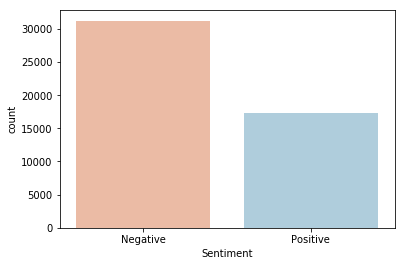

In [160]:
sns.countplot(x='Sentiment', data=df, palette='RdBu')

In [163]:
def convert_senti(sentiment):
    if sentiment == "Positive":
        return 1
    else:
        return -1
    
df['Sentiment_score'] = df['Sentiment'].apply(convert_senti)

In [164]:
df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_clean,Message_tokenized,length_int,checkint,year,month,Sentiment,Sentiment_score
0,0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",21,False,2003,4,Negative,-1
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",111,False,2003,4,Negative,-1
2,2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",46,False,2003,4,Negative,-1
3,3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",140,False,2003,4,Negative,-1
4,4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",22,False,2003,4,Negative,-1


In [165]:
df_sent = df.groupby(['country']).mean()
df_sent.reset_index(inplace = True)
df_sent.head()

,country,Unnamed: 0,id,length,checkint,year,month,Sentiment_score
0,Australia,55690.666667,45574.666667,43.888889,False,2015.000000,2.000000,0.111111
1,Bangladesh,49992.301587,39876.301587,43.571429,False,2013.063492,6.730159,-0.190476
2,Barbados,55749.500000,45633.500000,31.750000,False,2015.000000,2.000000,-1.000000
3,Canada,15879.035354,5763.035354,103.782828,False,2011.000000,1.000000,-0.252525
4,China,22615.878505,12499.878505,53.654206,False,2011.000000,3.186916,-0.177570


In [168]:
df_sent.sort_values(by='Sentiment_score')

,country,Unnamed: 0,id,length,checkint,year,month,Sentiment_score
2,Barbados,55749.500000,45633.500000,31.750000,False,2015.000000,2.000000,-1.000000
13,Lebanon,52091.500000,41975.500000,36.900000,False,2012.000000,7.000000,-1.000000
25,Slovenia,51398.500000,41282.500000,49.900000,False,2012.000000,2.000000,-0.600000
19,Nigeria,51798.500000,41682.500000,54.600000,False,2012.000000,5.000000,-0.600000
29,Turkey,55759.500000,45643.500000,24.200000,False,2015.000000,2.000000,-0.600000
22,Romania,51348.000000,41232.000000,27.777778,False,2012.000000,2.000000,-0.555556
11,Jamaica,55401.250000,45285.250000,30.375000,False,2014.000000,11.000000,-0.500000
10,Italia,55709.500000,45593.500000,44.200000,False,2015.000000,2.000000,-0.400000
24,Singapore,27081.409278,23200.872835,55.990854,False,2008.535217,6.046296,-0.378194
21,Philippines,49804.328358,39688.328358,47.417910,False,2011.850746,5.611940,-0.283582


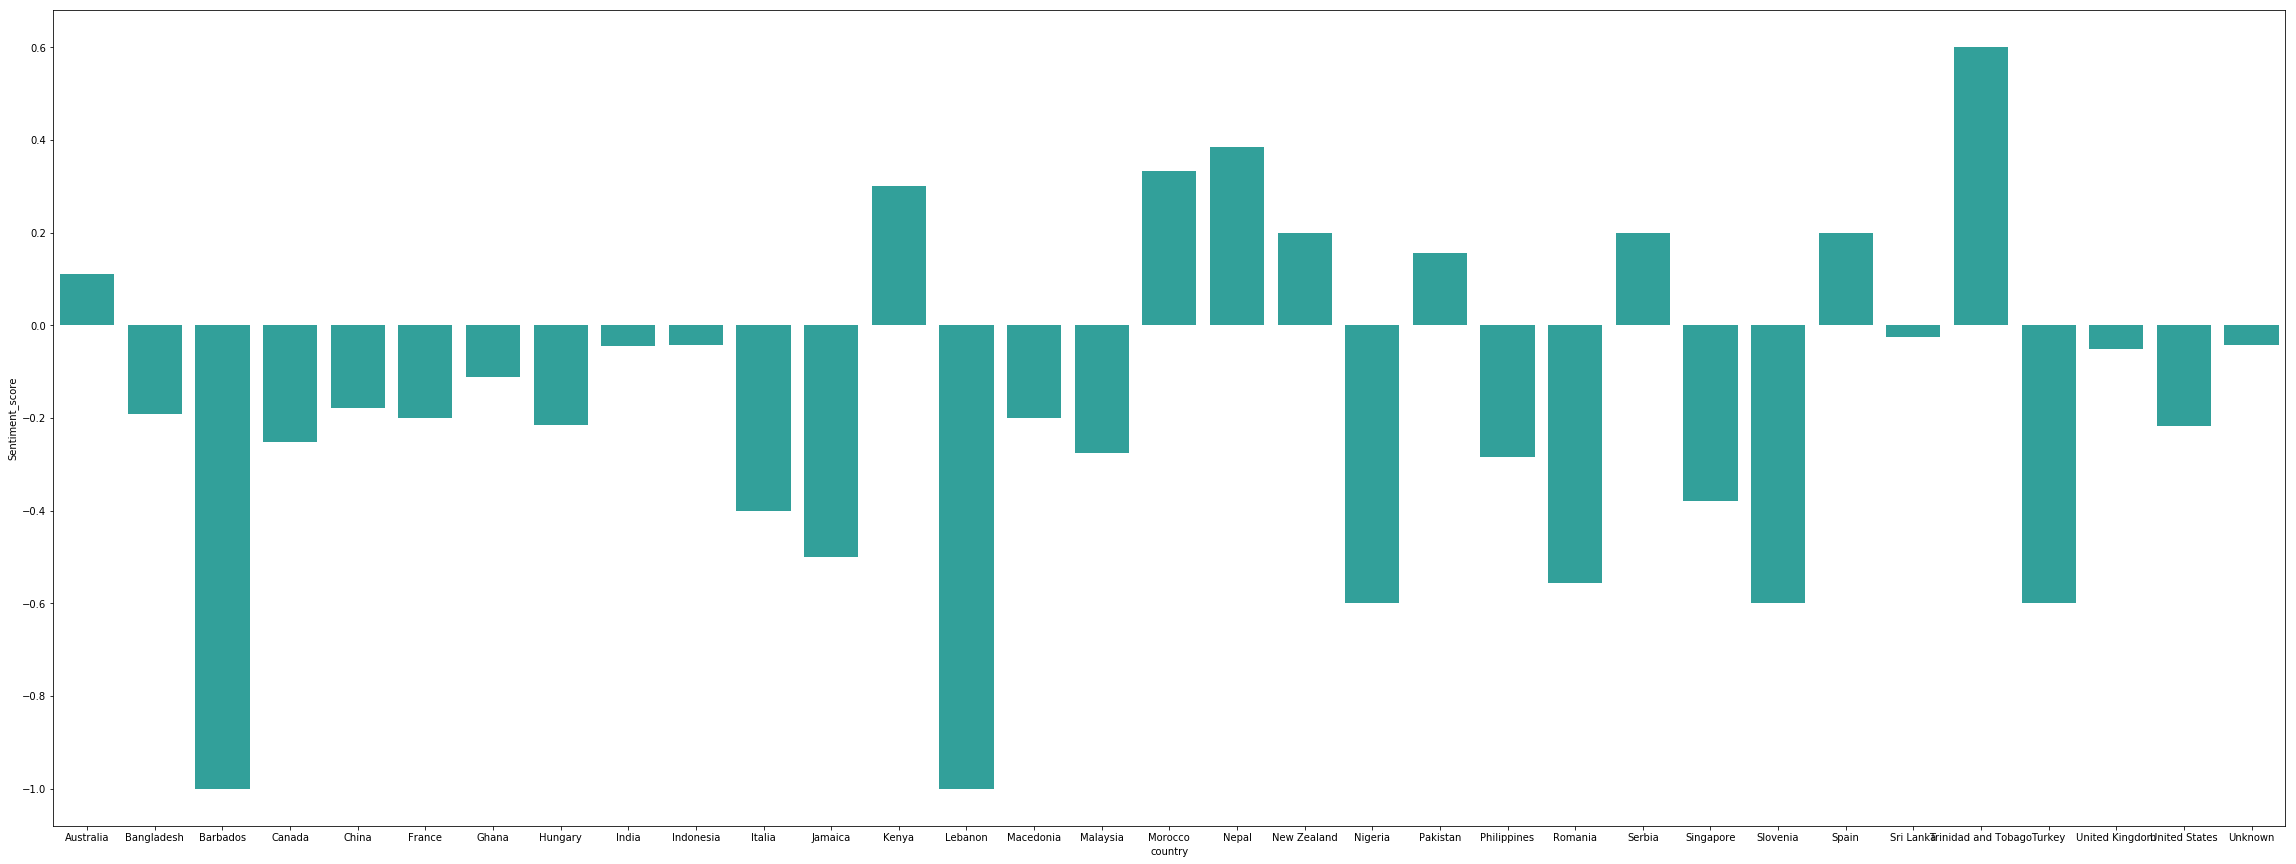

In [169]:
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='country', y='Sentiment_score', data=df_sent, ax=ax,
                 color="lightseagreen")